In [152]:
import os
import numpy as np
import imageio
import matplotlib.image
import nibabel as nib

In [153]:
num = "350"

In [157]:
t1 = 'G:/Dataset/BraTS20_Training_'+num+'/BraTS20_Training_'+num+'_t1.nii'
t1ce = 'G:/Dataset/BraTS20_Training_'+num+'/BraTS20_Training_'+num+'_t1ce.nii'
t2 = 'G:/Dataset/BraTS20_Training_'+num+'/BraTS20_Training_'+num+'_t2.nii'
flair = 'G:/Dataset/BraTS20_Training_'+num+'/BraTS20_Training_'+num+'_flair.nii'

In [158]:
img_t1 = nib.load(t1)
img_t1ce = nib.load(t1ce)
img_t2 = nib.load(t2)
img_flair = nib.load(flair)

In [159]:
img_t1 = nib.as_closest_canonical(img_t1)
img_t1ce = nib.as_closest_canonical(img_t1ce)
img_t2 = nib.as_closest_canonical(img_t2)
img_flair = nib.as_closest_canonical(img_flair)

In [160]:
img_t1 = img_t1.get_fdata()
img_t1ce = img_t1ce.get_fdata()
img_t2 = img_t2.get_fdata()
img_flair = img_flair.get_fdata()

In [154]:
img_t1 = np.load('G:/Dataset/BraTS20_Training_'+num+'/BraTS20_Training_'+num+'_t1.npy')
img_t1ce = np.load('G:/Dataset/BraTS20_Training_'+num+'/BraTS20_Training_'+num+'_t1ce.npy')
img_t2 = np.load('G:/Dataset/BraTS20_Training_'+num+'/BraTS20_Training_'+num+'_t2.npy')
img_flair = np.load('G:/Dataset/BraTS20_Training_'+num+'/BraTS20_Training_'+num+'_flair.npy')

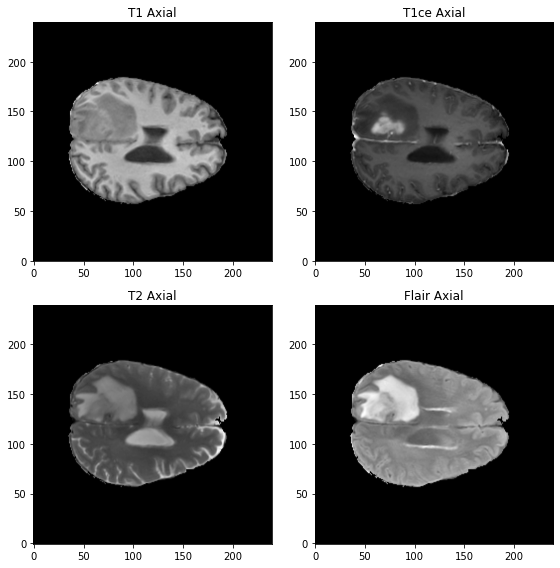

In [156]:
import numpy as np
import matplotlib.pyplot as plt

width=8
height=8
rows = 2
cols = 2
color_rgb = np.array([[0.1,0.2,0.3]])
axes=[]
fig=plt.figure(figsize=(width, height))
images= [img_t1[:, :, 1], img_t1ce[:, :, 1], img_t2[:, :, 1], img_flair[:, :, 1]]
titles = ["T1 Axial", "T1ce Axial", "T2 Axial", "Flair Axial"]
for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(titles[a])
    axes[-1].set_title(subplot_title)  
    plt.imshow(images[a],cmap="gray", origin="lower")
fig.tight_layout()    
plt.show()

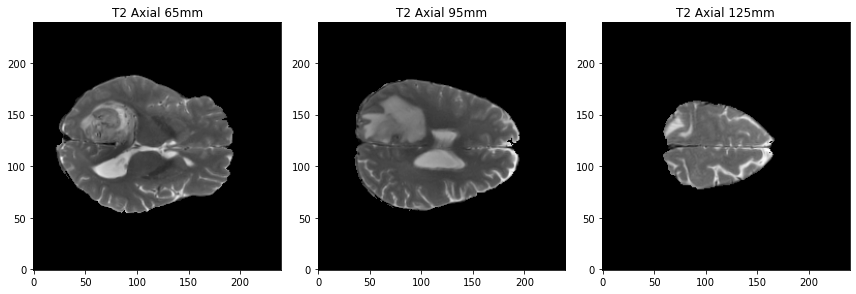

In [182]:
import numpy as np
import matplotlib.pyplot as plt

width=12
height=12
rows = 1
cols = 3
axes=[]
fig=plt.figure(figsize=(width, height))
images = img_t2[:,:,-90::30]
images = [images[:,:,i] for i in range(3)]
titles = ["T2 Axial 65mm", "T2 Axial 95mm", "T2 Axial 125mm", "Flair Axial"]
for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(titles[a])
    axes[-1].set_title(subplot_title)  
    plt.imshow(images[a],cmap="gray", origin="lower")
fig.tight_layout()    
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0.5, 0.98, 'Center slices for EPI image')

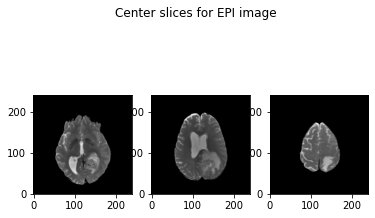

In [138]:
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = img_t2[:, :, 60]
print(slice_0)
slice_1 = img_t2[:, :, 90]
slice_2 = img_t2[:, :, 120]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")  

In [68]:
info = np.finfo(slice_2.dtype)

In [69]:
info

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [70]:
type(slice_0)

numpy.ndarray

In [61]:
slice_2 = slice_2.astype(np.float64) / info.max

In [62]:
slice_2 = 255 * slice_2

In [63]:
img = slice_2.astype(np.uint8)

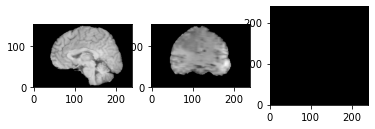

In [66]:
show_slices([slice_0, slice_1, img])